In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv("Social_Network_Ads.csv")


In [13]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [14]:
X=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [17]:
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [18]:
y_pred=classifier.predict(X_test)

In [19]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


In [22]:
cm

array([[66,  2],
       [ 8, 24]], dtype=int64)

In [23]:
from sklearn.metrics import accuracy_score
print("The accuracy score is: ",accuracy_score(y_pred,y_test))

The accuracy score is:  0.9


In [24]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        68
           1       0.92      0.75      0.83        32

    accuracy                           0.90       100
   macro avg       0.91      0.86      0.88       100
weighted avg       0.90      0.90      0.90       100



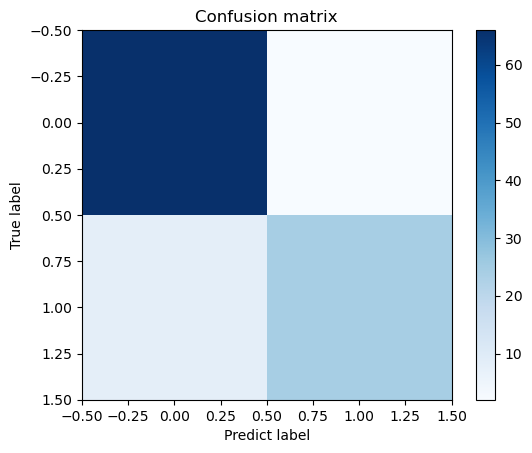

In [25]:
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
plt.xlabel("Predict label")
plt.ylabel("True label")
plt.show()